In [ ]:
import numpy as np

**Opening and writing to image files**

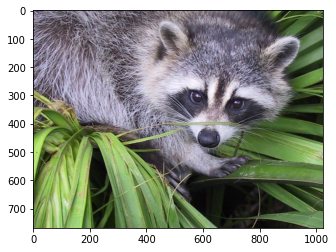

In [ ]:
from scipy import ndimage
from scipy import misc
import imageio
f = misc.face()
imageio.imsave('face.png', f) # uses the Image module (PIL)

import matplotlib.pyplot as plt
plt.imshow(f)
plt.show()

**Creating a numpy array from an image file:**

In [ ]:
import imageio
face = misc.face()
imageio.imsave('face.png', face) # First we need to create the PNG file

face = imageio.imread('face.png')
type(face)      

face.shape, face.dtype

((768, 1024, 3), dtype('uint8'))

**Use matplotlib and imshow to display an image inside a matplotlib figure:
Increase contrast by setting min and max values:**

(-0.5, 1023.5, 767.5, -0.5)

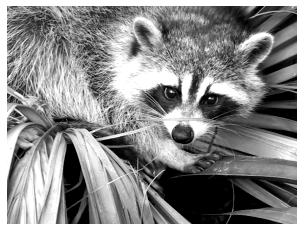

In [18]:
f = misc.face(gray=True)  # retrieve a grayscale image
import matplotlib.pyplot as plt
plt.imshow(f, cmap=plt.cm.gray)

plt.imshow(f, cmap=plt.cm.gray, vmin=30, vmax=200)        

# Remove axes and ticks
plt.axis('off')

**Increase contrast by setting min and max values:**

(-0.5, 1023.5, 767.5, -0.5)

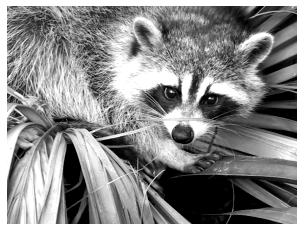

**Basic manipulations**

In [21]:
face = misc.face(gray=True)
face[0, 40]

# Slicing
face[10:13, 20:23]



face[100:120] = 255

lx, ly = face.shape
X, Y = np.ogrid[0:lx, 0:ly]
mask = (X - lx / 2) ** 2 + (Y - ly / 2) ** 2 > lx * ly / 4
# Masks
face[mask] = 0
# Fancy indexing
face[range(400), range(400)] = 255

**Geometric Manipuplations**

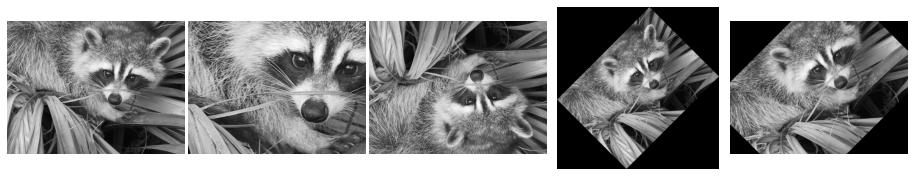

In [23]:
import numpy as np
import scipy.misc
from scipy import ndimage
import matplotlib.pyplot as plt

face = scipy.misc.face(gray=True)
lx, ly = face.shape
# Cropping
crop_face = face[lx//4:-lx//4, ly//4:-ly//4]
# up <-> down flip
flip_ud_face = np.flipud(face)
# rotation
rotate_face = ndimage.rotate(face, 45)
rotate_face_noreshape = ndimage.rotate(face, 45, reshape=False)

plt.figure(figsize=(12.5, 2.5))


plt.subplot(151)
plt.imshow(face, cmap=plt.cm.gray)
plt.axis('off')
plt.subplot(152)
plt.imshow(crop_face, cmap=plt.cm.gray)
plt.axis('off')
plt.subplot(153)
plt.imshow(flip_ud_face, cmap=plt.cm.gray)
plt.axis('off')
plt.subplot(154)
plt.imshow(rotate_face, cmap=plt.cm.gray)
plt.axis('off')
plt.subplot(155)
plt.imshow(rotate_face_noreshape, cmap=plt.cm.gray)
plt.axis('off')

plt.subplots_adjust(wspace=0.02, hspace=0.3, top=1, bottom=0.1, left=0,
                    right=1)

plt.show()

**Image filtering**

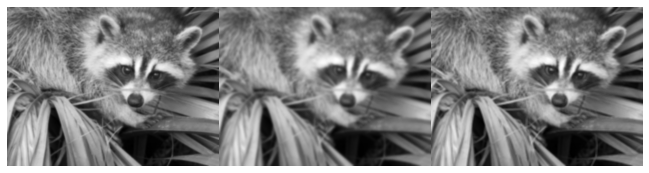

In [34]:
from scipy import ndimage
import matplotlib.pyplot as plt

face = scipy.misc.face(gray=True)
blurred_face = ndimage.gaussian_filter(face, sigma=3)
very_blurred = ndimage.gaussian_filter(face, sigma=5)
local_mean = ndimage.uniform_filter(face, size=11)

plt.figure(figsize=(9, 3))
plt.subplot(131)
plt.imshow(blurred_face, cmap=plt.cm.gray)
plt.axis('off')
plt.subplot(132)
plt.imshow(very_blurred, cmap=plt.cm.gray)
plt.axis('off')
plt.subplot(133)
plt.imshow(local_mean, cmap=plt.cm.gray)
plt.axis('off')

plt.subplots_adjust(wspace=0, hspace=0., top=0.99, bottom=0.01,
                    left=0.01, right=0.99)

plt.show()

**Image denoising**

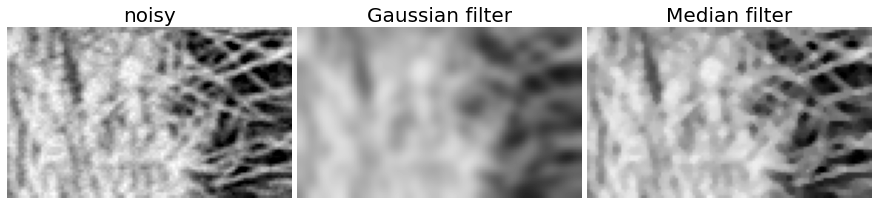

In [35]:
import scipy
import scipy.misc
from scipy import ndimage
import matplotlib.pyplot as plt

f = scipy.misc.face(gray=True)
f = f[230:290, 220:320]

noisy = f + 0.4*f.std()*np.random.random(f.shape)

gauss_denoised = ndimage.gaussian_filter(noisy, 2)
med_denoised = ndimage.median_filter(noisy, 3)


plt.figure(figsize=(12,2.8))

plt.subplot(131)
plt.imshow(noisy, cmap=plt.cm.gray, vmin=40, vmax=220)
plt.axis('off')
plt.title('noisy', fontsize=20)
plt.subplot(132)
plt.imshow(gauss_denoised, cmap=plt.cm.gray, vmin=40, vmax=220)
plt.axis('off')
plt.title('Gaussian filter', fontsize=20)
plt.subplot(133)
plt.imshow(med_denoised, cmap=plt.cm.gray, vmin=40, vmax=220)
plt.axis('off')
plt.title('Median filter', fontsize=20)

plt.subplots_adjust(wspace=0.02, hspace=0.02, top=0.9, bottom=0, left=0,
                    right=1)
plt.show()